## Análise Exploratória de Dados (EDA)

### Demanda de Energia Elétrica no Brasil

Este notebook tem como objetivo realizar a análise exploratória das séries temporais utilizadas no estudo, investigando padrões de tendência, sazonalidade, possíveis quebras estruturais visuais e relações preliminares entre as variáveis econômicas.

#### Perguntas que orientam a análise
* As séries possuem tendência de Longo Prazo? E os dados da demanda de energia elétrica industrial?

* Existem quebras Estruturais Econômicas que são visíveis nas séries? São compatíveis com as dummies?

* As variáveis se movem juntas, ou seja, a tendência é parecida?

* Há sazonalidade mensal da demanda de energia elétrica industrial?

* Existem outliers ou períodos atípicos?

### Bibliotecas de análise

In [114]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

### Definição de PATH (Engenharia)

In [115]:
from pathlib import Path

# Diretório raiz do projeto
PROJECT_ROOT = Path("..")

# Diretórios de dados
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"
DATA_INTERIM = PROJECT_ROOT / "data" / "interim"


# Diretórios de saída
RESULTS_FIGURES = PROJECT_ROOT / "results" / "figures"
RESULTS_TABLES = PROJECT_ROOT / "results" / "tables"

# Criar diretórios se não existirem
RESULTS_FIGURES.mkdir(parents=True, exist_ok=True)
RESULTS_TABLES.mkdir(parents=True, exist_ok=True)

## Carregando os Dados

In [116]:
# Carregar base final processada
df = pd.read_csv(
    DATA_INTERIM / "base_consolidada_real.csv",
    parse_dates=["date"],
    index_col="date"
)

df.head()


,demanda_energia,importacoes_petroleo,tarifa_energia_real,pib_real
date,,,,
1997-01-01,9455000.0,34.30,467.517793,661414.113517
1997-02-01,9840000.0,40.08,451.042648,603381.980588
1997-03-01,9488000.0,34.76,458.363948,591333.646663
1997-04-01,9945000.0,33.11,458.465453,613852.199952
1997-05-01,10304000.0,34.56,514.909651,649733.762544


## Análise Exploratória dos Dados Não logaritimizados

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345 entries, 1997-01-01 to 2025-09-01
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   demanda_energia       345 non-null    float64
 1   importacoes_petroleo  345 non-null    float64
 2   tarifa_energia_real   345 non-null    float64
 3   pib_real              345 non-null    float64
dtypes: float64(4)
memory usage: 13.5 KB


In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
demanda_energia,345.0,1.360056e+07,2.022828e+06,9.178000e+06,1.214100e+07,1.409200e+07,1.517400e+07,1.732200e+07
importacoes_petroleo,345.0,8.816872e+01,4.130133e+01,1.730000e+01,4.999000e+01,8.830000e+01,1.149600e+02,1.830400e+02
tarifa_energia_real,345.0,6.282562e+02,9.810018e+01,4.485770e+02,5.350331e+02,6.326571e+02,7.062052e+02,8.249809e+02
pib_real,345.0,8.238308e+05,1.575498e+05,5.362537e+05,6.569131e+05,8.456703e+05,9.741739e+05,1.100566e+06


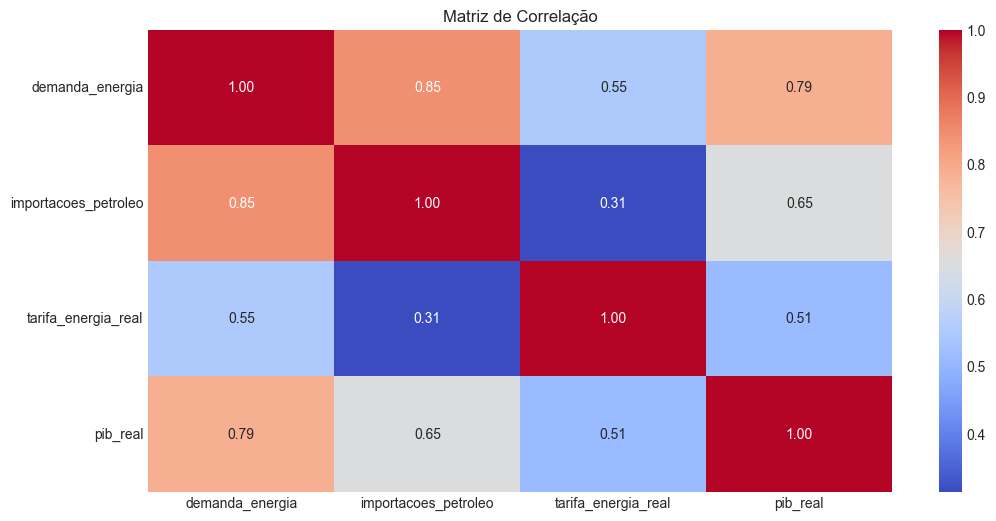

In [ ]:
corr = df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


## As séries de Dados Tem Tendência de Longo Prazo?

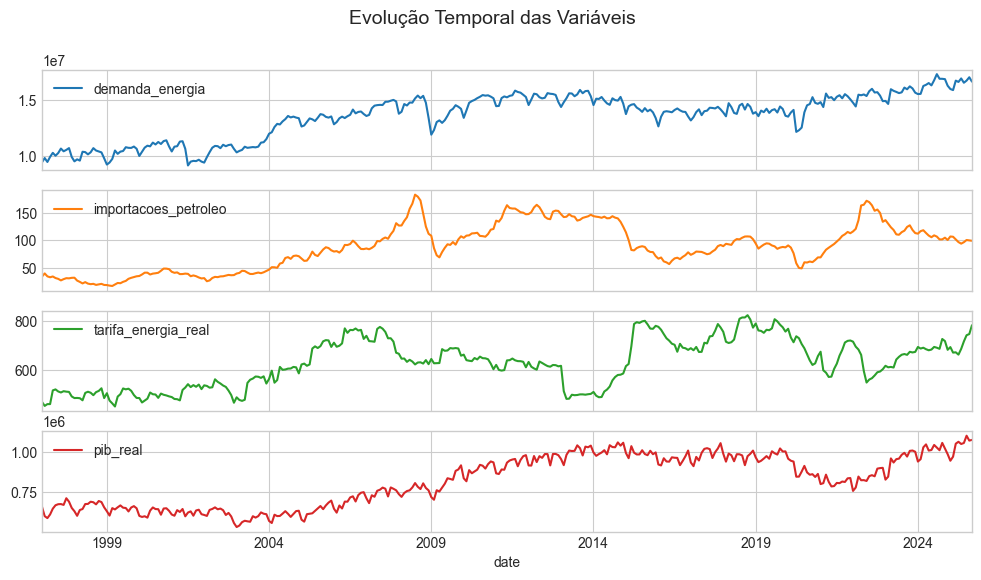

In [119]:
df.plot(subplots=True, layout=(df.shape[1], 1), sharex=True)
plt.suptitle("Evolução Temporal das Variáveis", fontsize=14)
plt.show()



------------------------------------------------------------------------------------
## RESPOSTA - As Séries Não Logaritimizadas possuem tendências de longo prazo?

* Demanda de Energia Elétrica - Sim
* Importações de Derivados do Petróleo - Possui oscilação, mas no longo prazo existe uma tendência positiva de crescimento.
* Tarifa de Energia Elétrica Industrial -  Sim, ao longo dos anos as Tarifa de Energia Elétrica do Setor Industrial estão em crescimento, tirando em alguns períodos que houveram intervenções e diminuição dessa Tarifa.
* PIB - Deflacionado - Sim, o PIB Têm uma tendência de crescimento de longo Prazo. 

----------------------------------------------------------------------------------------------
## PERGUNTA - Existem quebras Estruturais que são visíveis nas séries? Essas quebras estruturais podem ser incluídas como possíveis dummys?
---------------------------------------------------------------------------


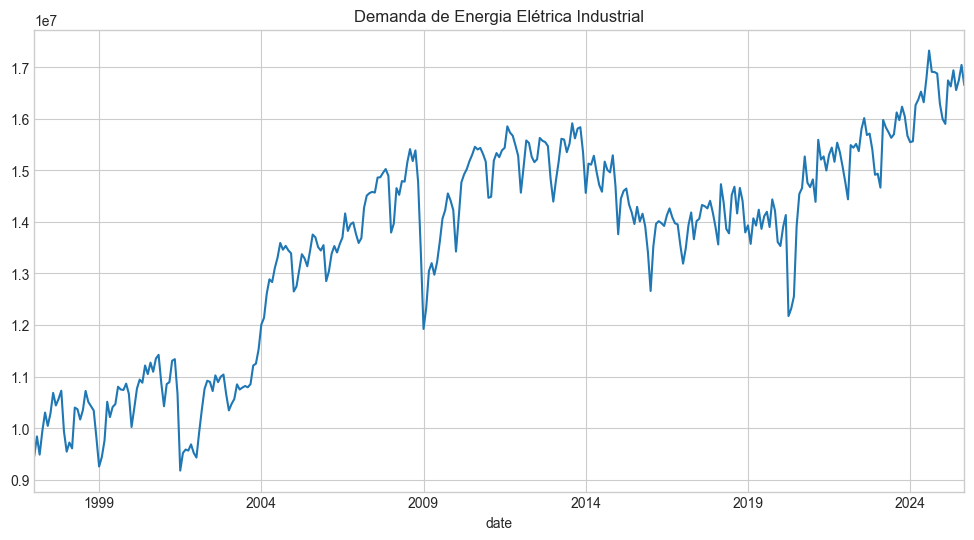

In [120]:
df["demanda_energia"].plot()
plt.title("Demanda de Energia Elétrica Industrial")
plt.show()

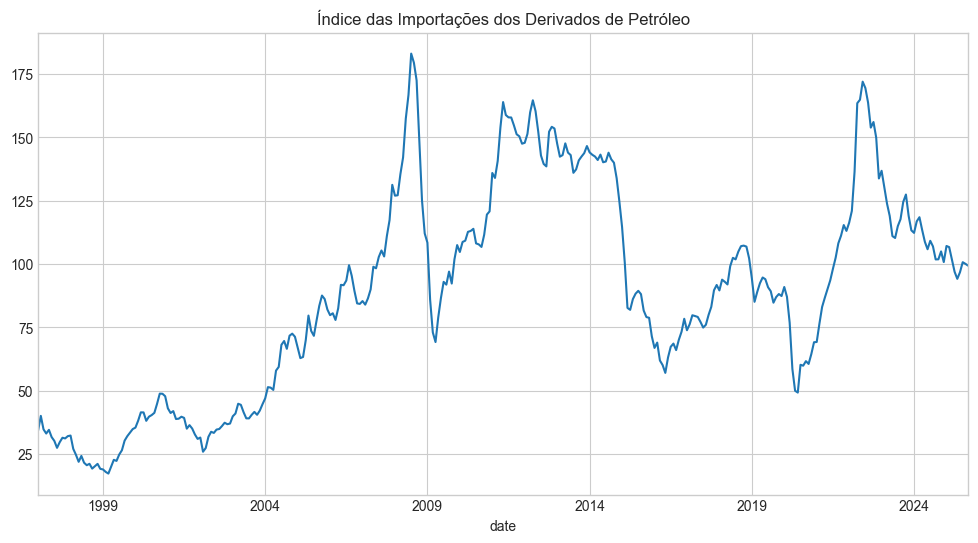

In [121]:
df["importacoes_petroleo"].plot()
plt.title("Índice das Importações dos Derivados de Petróleo")
plt.show()

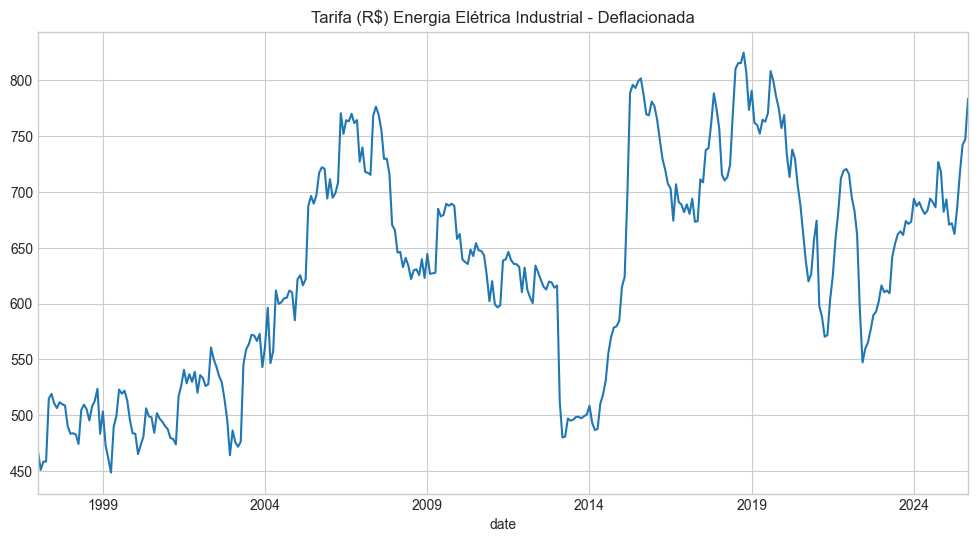

In [122]:
df["tarifa_energia_real"].plot()
plt.title("Tarifa (R$) Energia Elétrica Industrial - Deflacionada")
plt.show()

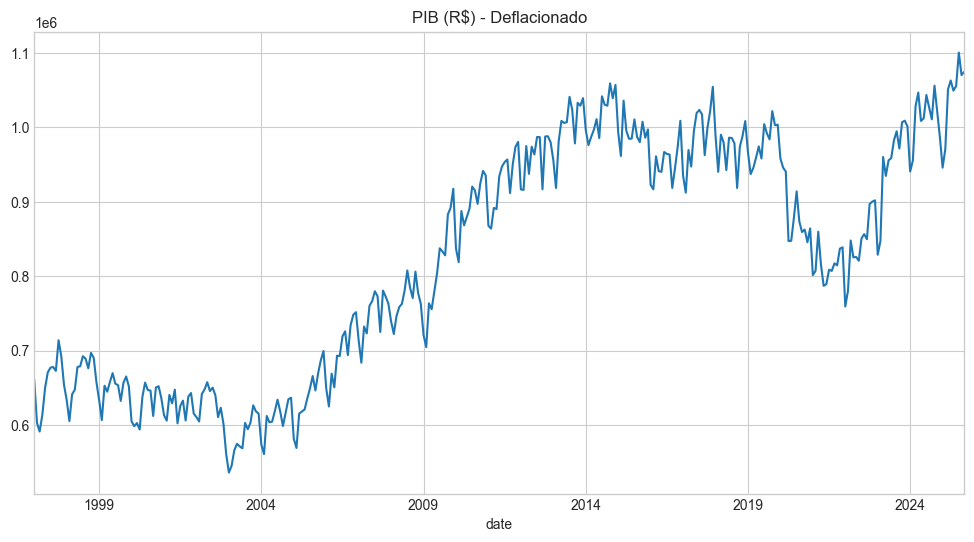

In [123]:
df["pib_real"].plot()
plt.title("PIB (R$) - Deflacionado")
plt.show()

----------------------------------------------------------------------------------------------
## Resposta - Existem quebras Estruturais que são visíveis nas séries? Essas quebras estruturais podem ser incluídas como possíveis dummys?

* Sim, existem! Os períodos analisados que podem ser quebras estruturais são:
* Apagão de 2001, que existiam possibilidades do Brasil inteiro ficar sem Luz.
* Erro Estatístico de 2006
* Crise Financeira de 2008 que teve impactos até início de 2009.
* Crise da Pandemia de 2019/2020. 
---------------------------------------------------------------------------


----------------------------------------------------------------------------------------------
## PERGUNTA -  Há sazonalidade mensal da demanda de energia elétrica industrial?
---------------------------------------------------------------------------


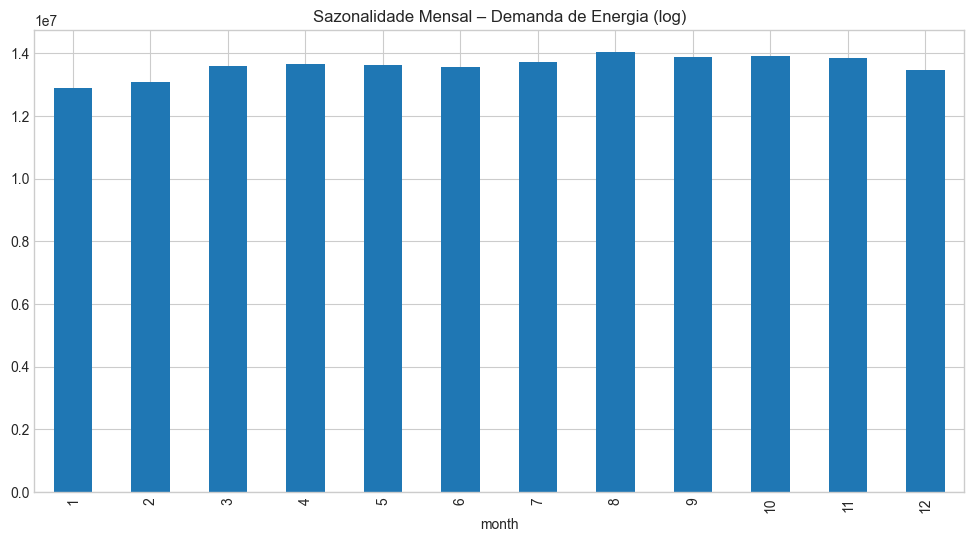

In [132]:

seasonal = df.groupby("month")["demanda_energia"].mean()
seasonal.plot(kind="bar")

plt.title("Sazonalidade Mensal – Demanda de Energia (log)")
plt.show()


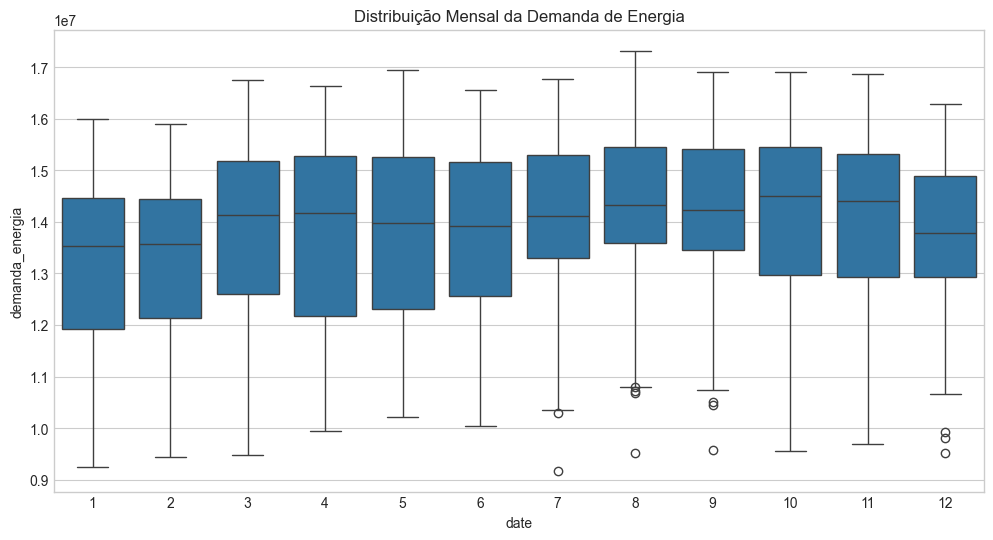

In [ ]:
df["date"] = df.index.month

sns.boxplot(data=df, x="date", y="demanda_energia")
plt.title("Distribuição Mensal da Demanda de Energia")
plt.show()


----------------------------------------------------------------------------------------------
## Resposta - Há sazonalidade mensal da demanda de energia elétrica industrial?
* Sim, existem! Mas ela não é tão abrupta/relevante.
---------------------------------------------------------------------------

----------------------------------------------------------------------------------------------
## Análise Exploratória dos Dados Logaritimizados
---------------------------------------------------------------------------

In [133]:
log_vars = [
    "demanda_energia",
    "tarifa_energia_real",
    "pib_real",
    "importacoes_petroleo"
]

for var in log_vars:
    df[f"ln_{var}"] = np.log(df[var])


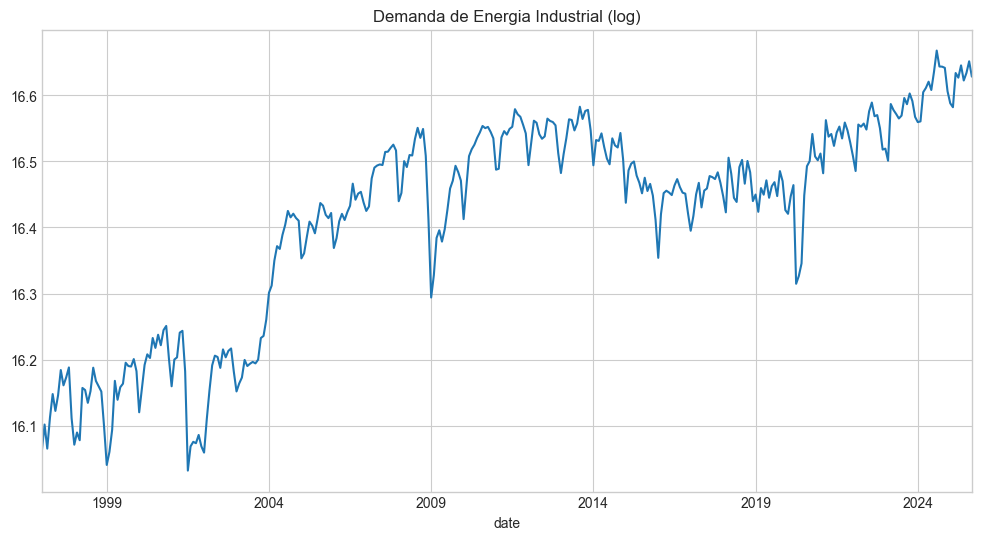

In [135]:
df["ln_demanda_energia"].plot()
plt.title("Demanda de Energia Industrial (log)")
plt.show()


In [136]:
corr = df[[f"ln_{v}" for v in log_vars]].corr()
corr

,ln_demanda_energia,ln_tarifa_energia_real,ln_pib_real,ln_importacoes_petroleo
ln_demanda_energia,1.000000,0.600641,0.795260,0.909993
ln_tarifa_energia_real,0.600641,1.000000,0.530807,0.504156
ln_pib_real,0.795260,0.530807,1.000000,0.703450
ln_importacoes_petroleo,0.909993,0.504156,0.703450,1.000000


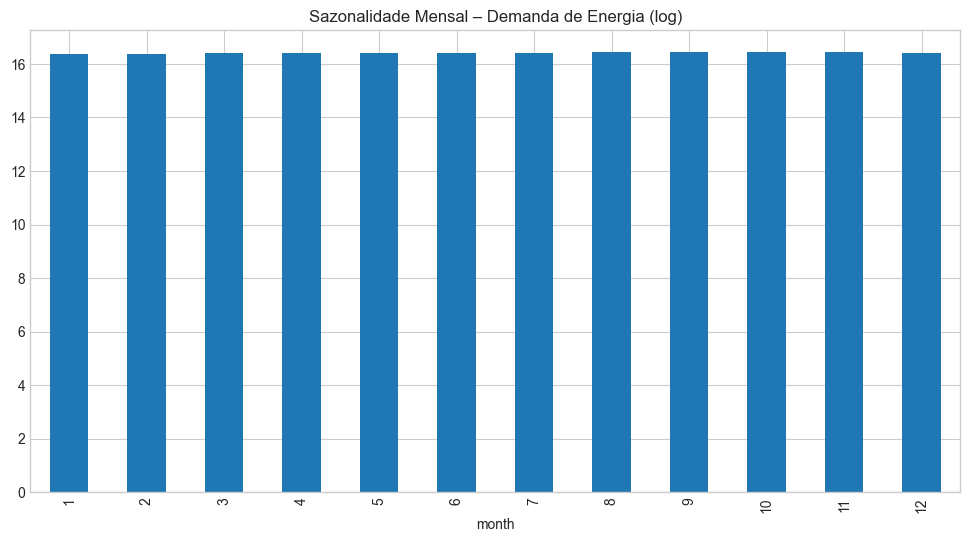

In [137]:
df["month"] = df.index.month

seasonal = df.groupby("month")["ln_demanda_energia"].mean()
seasonal.plot(kind="bar")

plt.title("Sazonalidade Mensal – Demanda de Energia (log)")
plt.show()


----------------------------------------------------------------------------------------------
# RESPOSTA FINAL - CONCLUSÕES DA ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

* ### As séries de dados apresentam Tendência Positiva de Longo Prazo - Ou seja, Não são séries Estacionárias pela análise de gráfico
* ### A transformação Logarítmica estabiliza a variância da série
* ### Existêm indícios Visuais de Quebras estruturais em 2001, 2008/2009 e 2020
* ### A Demanda de Energia elétrica Industrial é positivamente correlacionada com o PIB o que faz sentido com a metodologia
* ### A Demanda de Energia elétrica Industrial não é inversamente correlacionada com a TARIFA de Energia o que levanta hipóteses de Multicolinearidade, Heterocedasticidade ou Autocorrelação
* ### A sazonalidade mensal da demanda de energia elétrica industrial parece ser muito pequena para ser significativamete representativa

---------------------------------------------------------------------------